In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import cv2, sys, os
from google.colab.patches import cv2_imshow
import numpy as np
import math

In [5]:
img = '/content/gdrive/My Drive/camera.bmp'
gray_img = cv2.imread(img, 0)


Input image


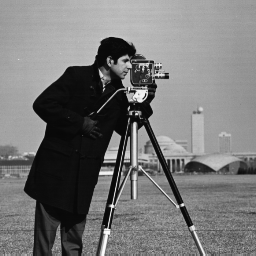

Area: 0.0
Perimeter:  2.0
Roundness 0.0


In [11]:
#import matplotlib.pyplot as plt
import cv2, sys, os
from google.colab.patches import cv2_imshow
import numpy as np
import math

img = '/content/gdrive/My Drive/Image_Processing/camera.bmp'
gray_img = cv2.imread(img, 0)

print("Input image")
cv2_imshow(gray_img)
#threshold를 이용하여 binary image로 변환
_, im = cv2.threshold(gray_img, 128, 255, 0)

def compute_roundness(im):
  #이진 영상의 외곽선 찾기
  contours, hierarchy = cv2.findContours(np.array(im, dtype = np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  #영역의 계수를 계산하여 분모 계산
  a = cv2.contourArea(contours[0])*4*math.pi
  #영역의 둘레를 계산하여 분자 계산
  b = math.pow(cv2.arcLength(contours[0], True), 2)
  print("Area:", a)
  print("Perimeter: ", cv2.arcLength(contours[0], True))
  #원형율 계산
  if b==0:
   return 0
  return a / b
print("Roundness", compute_roundness(im))  




Input image


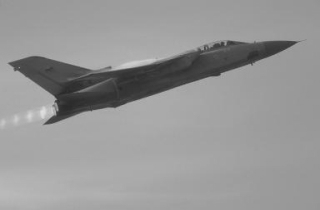

Binary image


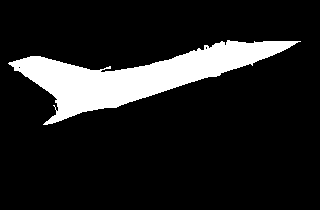

Morphology Dilation->noise removal


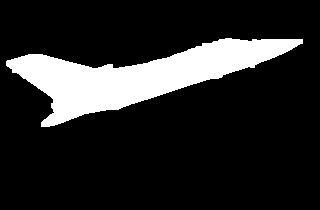

Bounding Box and Circles


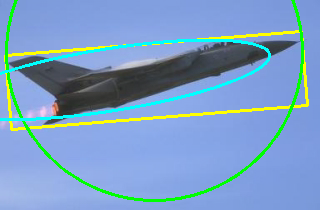

Elongation :  2.337078651685393


In [15]:
img_color = '/content/gdrive/My Drive/Image_Processing/airplane.bmp'
img_color = cv2.imread(img_color, 1)
gray_img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
print("Input image")
cv2_imshow(gray_img)
#threshold를 이용하여 binary image로 변환
_, img = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY_INV)
print("Binary image")
cv2_imshow(img)
print("Morphology Dilation->noise removal")
kernel = np.ones((5,5), np.uint8)
mor_img = cv2.dilate(img, kernel)
cv2_imshow(mor_img)

contours, hierarchy = cv2.findContours(np.array(mor_img, dtype=np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
#회전(기울어짐) 고려하지 않는 바운딩 박스
x, y, w, h = cv2.boundingRect(cnt)

#회전(기울어짐) 고려하는 바운딩 박스
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img_color, [box], 0, (0, 255, 255), 2)

#회전(기울어짐) 고려하는 타원
(x, y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)
cv2.circle(img_color, center, radius, (0, 255, 0), 2)

#회전(기울어짐) 고려하는 타원
ellipse = cv2.fitEllipse(cnt)
cv2.ellipse(img_color, ellipse, (255, 255, 0), 2)

#신장율 구하기
E = np.fabs(w-h)/h
print("Bounding Box and Circles")
cv2_imshow(img_color)
print("Elongation : ", E)


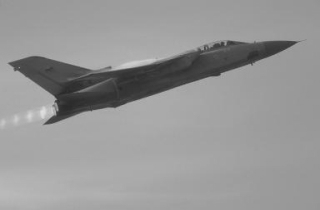

Segmented image


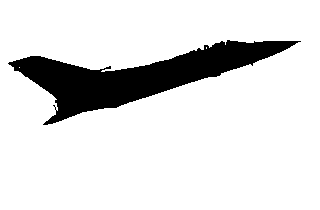

Moment
Phi 1 :3.06051, Phi 2 :6.96324, Phi 3 :13.78417, Phi 4 :11.61805, Phi 5 :-24.36273, Phi 6 :15.83384, Phi 7 :24.68937, 


In [14]:
from math import copysign, log10
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

# 모멘트 값을 로그를 취해서 변형된 값으로 출력할지 여부
showLogTransformedHuMoments = True
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/airplane.bmp')

# color영상을 gray영상으로 만들기
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)
#threshold를 이용하여 binary image로 변환
_,im = cv2.threshold(gray_img,128,255,0)

print("Segmented image")  
cv2_imshow(im)
#cv2.moment 함수를 사용하여 모멘트 계산
moment = cv2.moments(im)
# cv2.HuMoments함수를 이용하여 Hu 모멘트 계산
huMoments = cv2.HuMoments(moment)

print("Moment")  
# 7개의 불변 모멘트 출력
for i in range(0,7):
  if showLogTransformedHuMoments:
    print("Phi",i+1,":{:.5f}".format(-1*copysign(1.0,huMoments[i])*log10(abs(huMoments[i]))),end=', ')
  else:
    print("Phi",i+1,huMoments[i],end=' ')
print()